# Dividir el dataset en conjunto de entrenamiento y de testing

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [4]:
mainpath = "C:/Users/kmurg/OneDrive/Escritorio/Kev/1-Cursos/Machine Learning/python-ml-course-master/datasets"
data = pd.read_csv(mainpath+"/"+"ads/Advertising.csv")

In [18]:
a = np.random.randn(len(data))  

(array([ 4.,  3., 20., 42., 38., 53., 26.,  9.,  3.,  2.]),
 array([-2.88017523, -2.2616319 , -1.64308857, -1.02454524, -0.40600191,
         0.21254142,  0.83108476,  1.44962809,  2.06817142,  2.68671475,
         3.30525808]),
 <BarContainer object of 10 artists>)

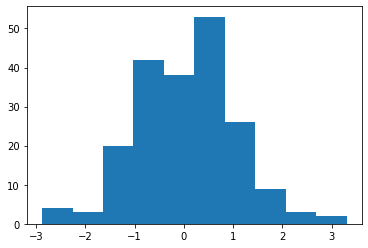

In [13]:
plt.hist(a)

In [14]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [15]:
len(training), len(testing)

(159, 41)

In [16]:
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     618.0
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           7.27e-75
Time:                        10:39:54   Log-Likelihood:                -312.40
No. Observations:                 159   AIC:                             630.8
Df Residuals:                     156   BIC:                             640.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8861      0.347      8.318      0.000       2.201       3.571
TV             0.0463      0.002     29.123      0.000       0.043       0.049
Radio          0.1818      0.009     19.636      0.000       0.164       0.200
==============================================================================
Omnibus:                       47.038   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.090
Skew:                          -1.289   Prob(JB):                     2.50e-23
Kurtosis:                       6.010   Cond. No.                         429.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.8861 + 0.0463 TV + 0.1818 Radio

# Validación del modelo con el conjunto de testing

In [21]:
sales_pred = lm.predict(testing)
sales_pred

0      20.404829
19     14.046646
24      8.059462
29      9.061701
34      7.568078
36     23.198361
38      9.735121
39     20.289492
58     21.657634
60      5.724855
65      7.769362
71     10.566110
79      9.652812
81     14.725633
87     15.390097
88     11.608032
105    17.703131
110    14.823479
111    20.977855
116    11.926262
120    14.296395
121     7.701723
123    14.872736
132     8.220692
146    15.321395
150    18.399832
153    18.030020
154    15.411176
157    10.052757
159    12.324822
162    14.893419
165    14.353149
171    14.296865
173    11.967924
179    12.365717
183    24.010548
184    18.500944
189     5.951448
192     4.427345
194    16.285187
198    23.643655
dtype: float64

In [23]:
SSD = sum((testing["Sales"] - sales_pred)**2)
SSD

87.3098789597455

In [25]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.5157929916969246

In [27]:
sales_mean = np.mean(testing["Sales"])
error = RSE / sales_mean *100
error

10.517433179822966